In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
original_df = pd.read_csv("desafio_manutencao_preditiva_treino.csv")
original_test_df = pd.read_csv("desafio_manutencao_preditiva_teste.csv")

Criando uma copia dos dados originais

In [3]:
df = original_df.copy()
df_test = original_test_df.copy()

In [4]:
#Analisando as linhas do dataset.
df.head()


,udi,product_id,type,air_temperature_k,process_temperature_k,rotational_speed_rpm,torque_nm,tool_wear_min,failure_type
0,1,M14860,M,298.1,308.6,1551,42.8,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,No Failure
2,5,L47184,L,298.2,308.7,1408,40.0,9,No Failure
3,6,M14865,M,298.1,308.6,1425,41.9,11,No Failure
4,7,L47186,L,298.1,308.6,1558,42.4,14,No Failure


Verificando se existem dados ausentes.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6667 entries, 0 to 6666
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   udi                    6667 non-null   int64  
 1   product_id             6667 non-null   object 
 2   type                   6667 non-null   object 
 3   air_temperature_k      6667 non-null   float64
 4   process_temperature_k  6667 non-null   float64
 5   rotational_speed_rpm   6667 non-null   int64  
 6   torque_nm              6667 non-null   float64
 7   tool_wear_min          6667 non-null   int64  
 8   failure_type           6667 non-null   object 
dtypes: float64(3), int64(3), object(3)
memory usage: 468.9+ KB


Analisando as estatísticas descritivas dos dados. 
As estatísitcas nos informar como esta a distribuição dos nossos dados, podem indicar a presença de outliers, e verificar a assimetria dos dados.

In [6]:
df.describe()

,udi,air_temperature_k,process_temperature_k,rotational_speed_rpm,torque_nm,tool_wear_min
count,6667.000000,6667.000000,6667.000000,6667.000000,6667.000000,6667.000000
mean,4994.589921,299.992515,309.992620,1537.419529,40.058512,108.098095
std,2896.125718,1.994710,1.488101,177.182908,9.950804,63.359915
min,1.000000,295.300000,305.700000,1168.000000,3.800000,0.000000
25%,2496.500000,298.300000,308.800000,1422.500000,33.200000,54.000000
50%,4983.000000,300.000000,310.000000,1503.000000,40.200000,108.000000
75%,7510.500000,301.500000,311.100000,1612.000000,46.800000,162.000000
max,10000.000000,304.500000,313.800000,2886.000000,76.600000,251.000000


Verificamos que a feature "rotational_speed_rpm" possui um desvio padrao alto, e no histograma verificamos que ela possui uma acentuação para a direita.

In [7]:
#Selecionando as features que acredito serem mais relevantes.
df1 = df[['air_temperature_k','process_temperature_k','rotational_speed_rpm','torque_nm','tool_wear_min', 'failure_type']]

In [8]:
df1.describe()

,air_temperature_k,process_temperature_k,rotational_speed_rpm,torque_nm,tool_wear_min
count,6667.000000,6667.000000,6667.000000,6667.000000,6667.000000
mean,299.992515,309.992620,1537.419529,40.058512,108.098095
std,1.994710,1.488101,177.182908,9.950804,63.359915
min,295.300000,305.700000,1168.000000,3.800000,0.000000
25%,298.300000,308.800000,1422.500000,33.200000,54.000000
50%,300.000000,310.000000,1503.000000,40.200000,108.000000
75%,301.500000,311.100000,1612.000000,46.800000,162.000000
max,304.500000,313.800000,2886.000000,76.600000,251.000000


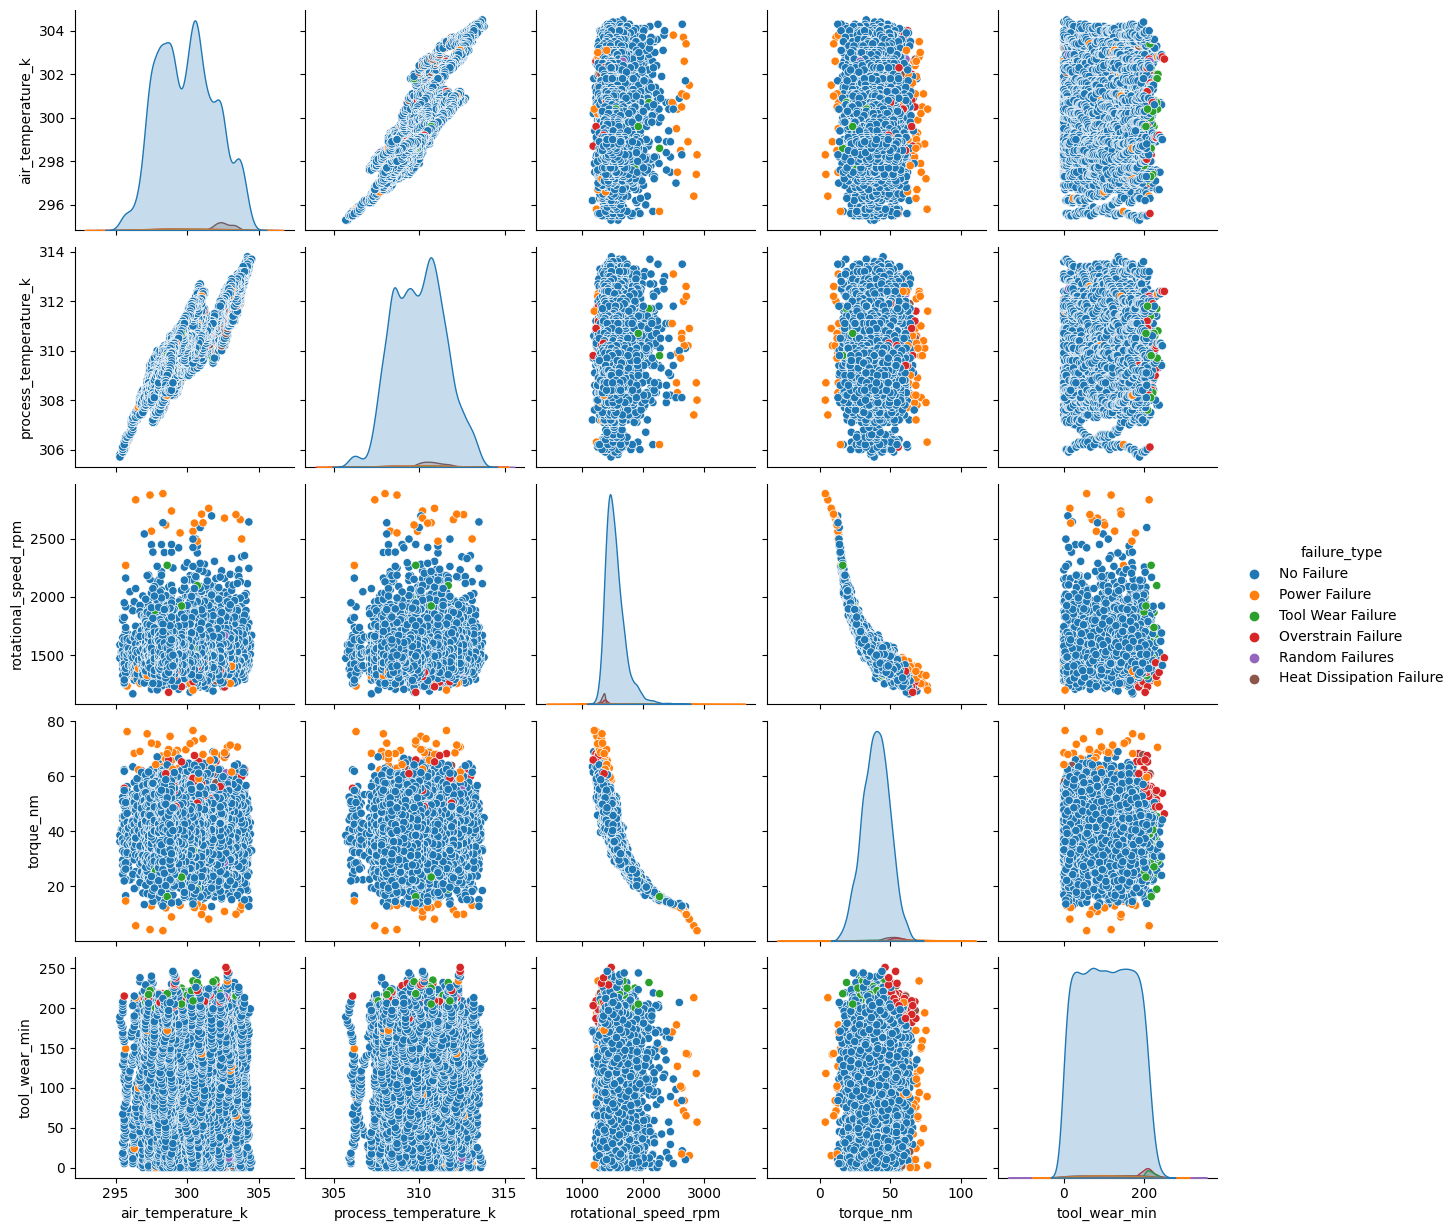

In [9]:
#Grafico de pares
sns.pairplot(df1, hue='failure_type')

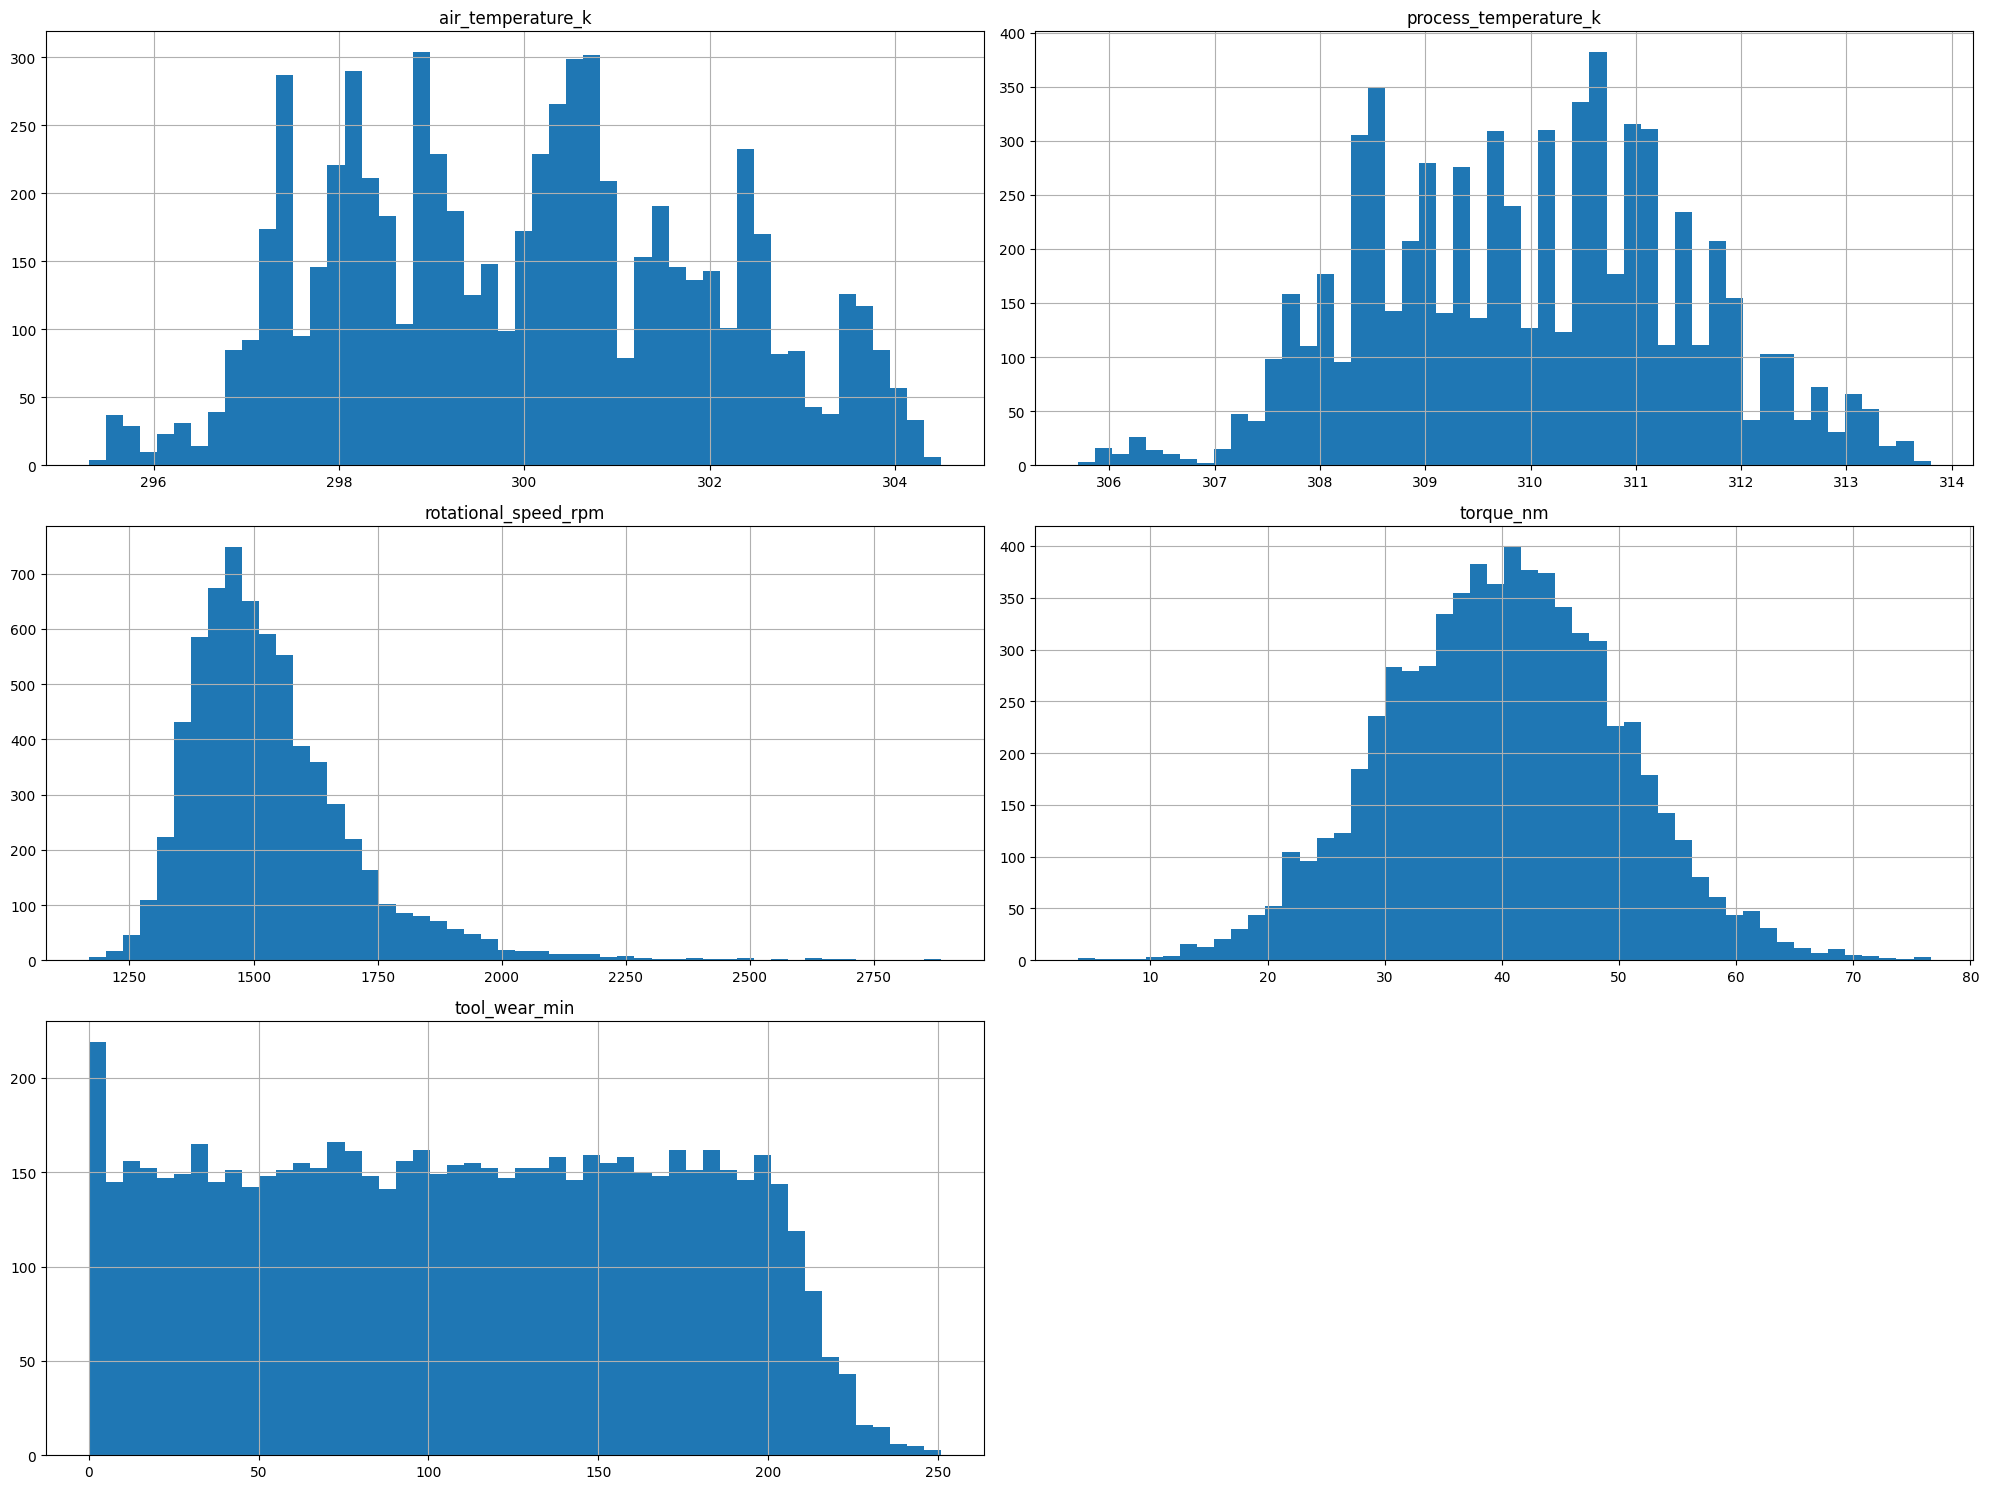

In [10]:
#Histograma de todas as features importantes.
df1.hist(bins=50, figsize=(20,15))
plt.tight_layout()
plt.show()

In [11]:
X = df1[['air_temperature_k','process_temperature_k','rotational_speed_rpm','torque_nm','tool_wear_min']]
y = df1['failure_type']


In [12]:
#Normalizando os dados
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [13]:
# Separação dos dados em conjuntos de treinamento e teste.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Treinamento do modelo.
model = LogisticRegression(multi_class='ovr', solver='lbfgs')
model.fit(X_train, y_train)

# Previsões com o modelo treinado.
y_pred = model.predict(X_test)

#Precisão do modelo.
acc = accuracy_score(y_test, y_pred)
print("Acurácia: {:.2f}%".format(acc * 100))

Acurácia: 97.15%


In [14]:
#precision.
print(precision_score(y_test, y_pred, average='weighted'))
#recall.
print(recall_score(y_test, y_pred, average='weighted'))
#f1_score.
print(f1_score(y_test, y_pred, average='weighted'))


0.9532031450235549
0.9715142428785607
0.9613989767312798


c:\Users\lopes\Desktop\Indicium - Formação em Dados\env\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [15]:
# Get the coefficients
coefficients = model.coef_
intercept = model.intercept_

# Print the coefficients
tabela = pd.DataFrame(coefficients, columns=['air_temperature_k','process_temperature_k','rotational_speed_rpm','torque_nm','tool_wear_min'])
tabela.index = [['No Failure', 'Power Failure', 'Tool Wear Failure','Overstrain Failure', 'Random Failures','Heat Dissipation Failure']]
tabela


,air_temperature_k,process_temperature_k,rotational_speed_rpm,torque_nm,tool_wear_min
No Failure,5.374251,-3.471298,-3.976634,0.006219,0.028715
Power Failure,-1.483246,1.005835,-1.983773,-2.691735,-0.849239
Tool Wear Failure,-0.355179,0.213122,-0.419937,2.466559,4.620979
Overstrain Failure,-0.004826,-0.110788,3.959388,4.999066,0.003355
Random Failures,-0.119131,0.725049,-0.028269,0.320571,0.015393
Heat Dissipation Failure,0.255827,-0.150328,-0.098040,-0.684766,3.513460


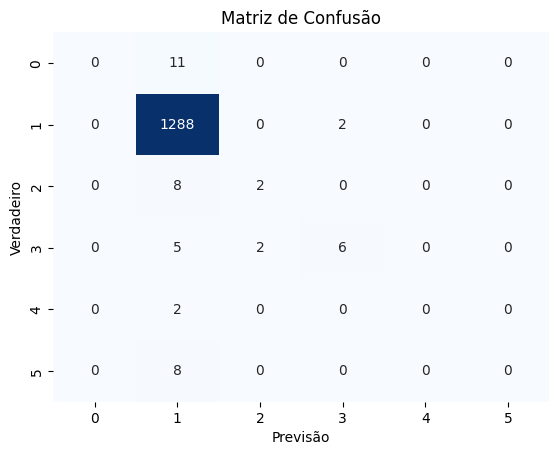

In [16]:
# Calculando a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotando a matriz de confusão usando o seaborn
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Previsão')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão')
plt.show()

In [17]:
#Fazendo a previsão com os dados de teste.

x_predict = df_test[['air_temperature_k','process_temperature_k','rotational_speed_rpm','torque_nm','tool_wear_min']]
y_pred2  = model.predict(x_predict)

c:\Users\lopes\Desktop\Indicium - Formação em Dados\env\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [18]:
predict = pd.DataFrame(y_pred2)
predict.to_csv('predicted.csv')